# NYC Yellow Taxi Ride Data - Haanbi Kim, Christopher Park

## Introduction <br>
The following data science project is to demonstrate different techniques that will help demonstrate the trends in yellow taxi rides across New York City for 2022. With the risen popularity of rideshare services like Uber and Lyft, it is natural to assume that the composition of riders and trends in rides may have changed drastically. One central hypothesis that will be tested is that there are certain niche purposes Yellow Taxis are used for, as the mechanism of taxi pricing is different from pricing in Uber or Lyft, which is based off of immediate supply and demand mechanism. The dataset for the following project can be found in this link: https://data.cityofnewyork.us/Transportation/2022-Yellow-Taxi-Trip-Data/qp3b-zxtp/about_data and is downloaded as a .csv file. Documentation on specific columns can also be referred to through the link. An overarching assumption we will be making is that Yellow Taxis are direct substitutes of rideshare services, and that they are "luxury goods" in comparison to other modes of public transportation like trains and buses. As a technical note, this project will focus on using matplotlib visualizations due to the size of the dataset.

## Hypotheses to Test & Questions to Ask <br>
Note that questions limited are not solely limited to these, following questions, but rather serve as a guide that will direct some of the analysis that will be performed.
1. Is there clear segmentation of types of rides in the market, what kind of temperament in riders can we see?
2. Seasonal/hourly/daily variation is a considerable factor in analyzing how New Yorkers decide transportation options.
3. Indicators of more stressful ridership (e.g. low tip, high passenger count, longer distance traveled) are explanatory factors for adverse transactional outcomes like voided and disputed fares.
4. To what extent can we see a tradeoff between Yellow Taxis and other forms of public transportation, namely trains? In other words, does the presence of subway stations within a taxi pickup zone code influence pickup and dropoff outcomes?
5. Can we see discrepancies in ridership across boroughs?

## Overall Objective & Further Applications <br>
The following project hopes to uncover important trends and distinctions in ridership across the City and can advise policymakers to improve transportation outcomes in the busiest city in the world. Further applications can be extended to other real-time transportation datasets, such as Citibike data: https://citibikenyc.com/system-data. Statistical and visualization techniques acquired from the course and through prerequisite coursework will be applied. 

---------

## 1) Initial Exploratoration <br>
This portion will delve into properties of the dataset, which will serve as the basis for data preprocessing. Note that each row in the dataset represents a distinct taxi ride.

In [40]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
import sklearn.preprocessing as skp

In [41]:
# import dataset
df=pd.read_csv('2022_Yellow_Taxi_Trip_Data.csv')

/var/folders/d9/xrg8ngs979z999th3_nhl6sm0000gn/T/ipykernel_53295/4017191276.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2022_Yellow_Taxi_Trip_Data.csv')


In [42]:
# information on columns and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39656098 entries, 0 to 39656097
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 5.6+ GB


Notice that most of our columns are of numerical datatypes. Because we would also want to transform this into categorical versions for particular questions we aim to ask, preprocessing on certain columns will be necessary. Also note that this is a considerably large dataset - in the case where computations of the full dataset are not feasible due to computing power constraints, a random sample of the dataset may be applied. Assuming that the random sample will be able to behave like the full dataset, this will not sacrifice the quality of the outcomes significantly. Next, extracting summary statistics will give us insight into the tendencies of the data columns. <br>

In [43]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.965610e+07,3.828780e+07,3.965610e+07,3.828780e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.965610e+07,3.828780e+07,3.828780e+07
mean,1.721802e+00,1.401149e+00,5.959399e+00,1.424172e+00,1.648660e+02,1.625752e+02,1.189550e+00,1.036282e+01,1.007532e+00,4.888064e-01,7.234908e+00,5.362827e-01,3.161243e-01,2.167127e+01,2.281437e+00,9.741937e-02
std,4.805267e-01,9.628938e-01,5.991907e+02,5.794343e+00,6.531082e+01,7.023146e+01,5.190411e-01,2.232830e+04,1.262564e+00,9.380395e-02,2.232808e+04,2.043351e+00,1.293323e-01,9.637360e+01,7.519435e-01,3.385391e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.333914e+08,-2.218000e+01,-5.500000e-01,-4.100000e+02,-9.999000e+01,-1.000000e+00,-2.567800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,9.300000e-01,0.000000e+00,3.000000e-01,1.230000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.900000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.596000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.560000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.650000e+01,2.500000e+00,5.000000e-01,3.360000e+00,0.000000e+00,3.000000e-01,2.316000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.896785e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,2.548000e+01,1.333914e+08,9.118700e+02,1.000000e+00,4.010956e+05,2.750000e+00,1.250000e+00


We can already note some unrealistic values from certain columns. The first being that the min value for passenger is 0, which seems to be off-putting and unrealistic. Similarly, there seems to be rides that show negative values for values such as `fare_amount`,`extra`,`mta_tax`,`tip_amount`, and so on. These are also values that we may not want and will hence be removed.

Another column of interest will be the `PULocationID` and `DOLocationID` columns, which provide information on pickup and dropoff location for each ride.

In [44]:
df[['PULocationID','DOLocationID']].head()

,PULocationID,DOLocationID
0,142,236
1,236,42
2,166,166
3,114,68
4,68,163


Pickup and dropoff location data is based on a code number rather than latitude/longitude data, which may be more useful for identifying spatial trends. If we are to use locational data, we may need to consider incorporating another dataset that can make these codes more meaningful, as just by ID number alone nothing can be determined.

Intuitively, values such as `fare_amount`, `tip_amount` have not particular upper threshold, which may indicate the possibility of outliers. To show this, let us just plot one boxplot for `fare_amount`.

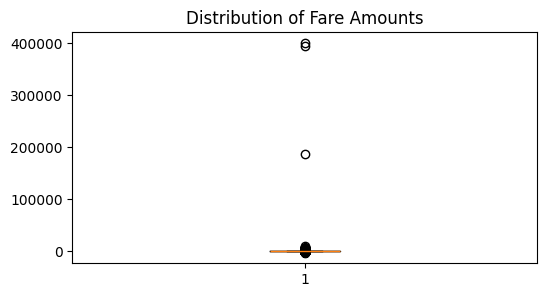

In [45]:
plt.figure(figsize=(6,3))
plt.title('Distribution of Fare Amounts')
plt.boxplot(df['total_amount'])
plt.show()

As we can see, there are outliers that are significantly off from the rest of the dataset, which can skew our results. As such, our dataset presents instances for which we will need some preprocessing performed.

--------

-------

## 2) Data Preprocessing

The following section will perform various operations to clean the data fit for our purposes. Techniques involved will be data normalization, incorporating supplemental dataframes, removing outliers and unrealistic values, and converting categorical data denoted numerically into more readable values.

#### 2.1) Ruling out outliers and Preserving Columns of Interest

We mentioned previously that continuous numerical variables with no hard upper threshold are susceptible to large outliers that will skew visualizations and computations. The columns that fall under this are the following: <br>
`fare_amount`, `tip_amount`, `trip_distance`, `extra`. Note that much of the numerical columns, such as `fare_amount` or `total_distance` are closely related to each other. Hence, much of these filters will apply for one another (i.e. if the tax is an outlier, then it is likely that the fare will be an outlier as well). **Note**: Although standard procedure follows that anything under 3 standard deviations is considered an outlier, some initial plotting suggests that this may be too high as there is still a large amount of outliers that skew visualizations. To mitigate this as much as possible, we will be using 2 standard deviations.  <br>

We will rule out these outliers. Additionally, columns like `VendorID`, which categorizes the technology brand used for the meter machine of each taxi trip, are irrelevant for this analysis, and will also be removed. <br>

Other unmentioned rows that we will drop is whether a fare is 0, or for rides that have an unknown payment type.<br>

We will also drop unknown charges in `payment_type`, which is represented with value of 5.0. <br>

In [46]:
mask=df.loc[:,['fare_amount','tip_amount',
               'trip_distance','extra',
               'total_amount']].apply(lambda n: (np.abs(n-n.mean())/n.std() < 2)).all(axis=1) # removes outliers
mask2=df.loc[:,['passenger_count','fare_amount','tip_amount',
                'trip_distance','extra',
              'total_amount','mta_tax',
                'tolls_amount','congestion_surcharge']].apply(lambda n:n>=0).all(axis=1) # removes negative rows
df=df.loc[(mask)&(mask2)&(df.payment_type!=5.0)&(df.passenger_count>0.0),:]
df=df.loc[np.sum(df.isna(),axis=1)==0,:] # also get rid of rows with na values

In [47]:
df=df.drop(columns=['VendorID','store_and_fwd_flag','airport_fee',
                    'mta_tax','improvement_surcharge','RatecodeID']) # drop irrelevant columns

#### 2.2) Add Meaning to Numerically Designated Categories

Additionally, we also posited whether there were any explanatory factors to whether a fare is disputed or voided. We can see the type of payment that is performed at the end of the ride through the `payment_type` column. According to the dataset's data dictionary, we get the following values: <br>
0: Flex-Fare Trip, 1: Credit Card, 2: Cash, 3: No charge, 4: Dispute, 5: Unknown, 6: Voided trip<br>
We will be creating a separate column that categorizes adversarial transactional outcomes, namely disputed fares. A mapping dictionary will be used to apply this.

In [48]:
mappingDictPay={
    0.0: 'Normal',
    1.0: 'Normal',
    2.0: 'Normal',
    3.0: 'Normal',
    4.0: 'Problem',
    6.0: 'Problem'
}

df['payment_cat']=df['payment_type'].map(mappingDictPay)

#### 2.3) Date Column Modification 

The pickup and dropoff datetimes are shown as strings and not datetime objects. We would like to convert these to datetime objects to make operations easier.

In [49]:
# convert columns into datetime object
# format is specified to speed up operation
df['tpep_pickup_datetime']=pd.to_datetime(df.tpep_pickup_datetime,
                                          format='%m/%d/%Y %I:%M:%S %p') 
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'],
                                           format='%m/%d/%Y %I:%M:%S %p')

In [50]:
# We also want to extract information on specific components of the datetime
df['ride_date']=df['tpep_pickup_datetime'].dt.date
df['ride_day']=df['tpep_pickup_datetime'].dt.day
df['ride_hour']=df['tpep_pickup_datetime'].dt.hour
df['ride_month']=df['tpep_pickup_datetime'].dt.month
df['ride_day_name']=df['tpep_dropoff_datetime'].dt.day_name()

# We also have some datapoints that are from different years. We will be dropping these observations
df=df.loc[df['tpep_pickup_datetime'].dt.year==2022,:]

In [51]:
# We can also create quarterly categories as well, using binning techniques
df['quarter']=skp.KBinsDiscretizer(n_bins=4, encode='ordinal').fit_transform(df.ride_month.values.reshape(-1,1))
df['quarter']=df['quarter'].replace({0.0:"Q1",1.0:"Q2",2.0:"Q3",3.0:"Q4"})

#### 2.4) Incorporating Data on External Factors

We will now import a dataset that shows the locational meaning of these pickup and dropoff codes, which is represented as polygon data coordinates. Additionally, we will also like to test how immediate and gradual changes in environment impact taxi usage, for which seasonal and weather aspect will serve as proxies. We would like to see how these exogenous variables can potentially impact taxi demand.

In [52]:
# importing locational data on taxi pickup and dropoff location zones, downloaded from NYC Open Data
dfZoneLoc=pd.read_csv('taxi_zones.csv')

In [53]:
# requesting weather data from weather api
url = "https://meteostat.p.rapidapi.com/point/daily"

querystring = {"lat":"43.6667","lon":"-79.4","start":"2022-01-01","end":"2022-12-31"} 
# Import data on weather from all days in 2022 in NYC. 

headers = {
	"X-RapidAPI-Key": "e54a31e7a6mshb39a3122acd1676p1f59d6jsn071605b04823",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dfWeather=pd.DataFrame(response.json()['data'])

In [54]:
# arbitrary line to import api data saved as csv to avoid throttling later on
# dfWeather=pd.read_csv('weather.csv')

In [55]:
# convert date to datetime object and extract key info. (year, month, date)
dfWeather['date']=pd.to_datetime(dfWeather['date'])

In [56]:
# create mapping dictionary to add zone information
mappingDict2={}
for i in dfZoneLoc.LocationID:
    mappingDict2[i]=dfZoneLoc.loc[dfZoneLoc.LocationID==i,'zone'].values[0]
df['PU_Zone']=df['PULocationID'].map(mappingDict2)
df['DO_Zone']=df['DOLocationID'].map(mappingDict2)

# from this, we can also see that there are some nan values, which come from
# location ids larger than 262. this is because the taxizone.csv datafile only
# has up to location id 262, so any code id that is not in the taxi zone dataset will be dropped
df=df.loc[(df.PULocationID<=262)&(df.DOLocationID<=262),:]

In [57]:
# create another mapping dictionary to add borough information
# also add cross-borough information to see whether people venture into other boroughs or not by taxi
mappingDictBorough={}
for i in dfZoneLoc.LocationID:
    mappingDictBorough[i]=dfZoneLoc.loc[dfZoneLoc.LocationID==i,'borough'].values[0]
df['PU_Borough']=df['PULocationID'].map(mappingDictBorough)
df['DO_Borough']=df['DOLocationID'].map(mappingDictBorough)

df['crossBorough']=df.loc[:,'PU_Borough']!=df.loc[:,'DO_Borough']

df=df.loc[(df.PU_Borough!='EWR')&(df.DO_Borough!='EWR'),:] 
# drop rides concerning EWR, Newark Airport as it is not in NYC

#### 2.5) Data Normalization

Even with ruling out outliers, it still may be necessary to normalize data that has no hard upper threshold. We will also be comparing continuous variables of different units (for instance, trip distance and fares). In order to make better comparisons between such variables, it will be necessary to normalize our data. We will be normalizing the following variables: `['trip_distance','fare_amount','extra','tip_amount','total_amount']`.

In [58]:
df['trip_distance_norm']=skp.MinMaxScaler().fit_transform(df['trip_distance'].values.reshape(-1,1))
df['fare_amount_norm']=skp.MinMaxScaler().fit_transform(df['fare_amount'].values.reshape(-1,1))
df['extra_norm']=skp.MinMaxScaler().fit_transform(df['extra'].values.reshape(-1,1))
df['tip_amount_norm']=skp.MinMaxScaler().fit_transform(df['tip_amount'].values.reshape(-1,1))
df['total_amount_norm']=skp.MinMaxScaler().fit_transform(df['total_amount'].values.reshape(-1,1))
df['passenger_count_norm']=skp.MinMaxScaler().fit_transform(df['passenger_count'].values.reshape(-1,1))

In [59]:
# final product after initial data cleaning and preprocessing
df=df.reset_index().drop(columns=['index'])
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,...,DO_Zone,PU_Borough,DO_Borough,crossBorough,trip_distance_norm,fare_amount_norm,extra_norm,tip_amount_norm,total_amount_norm,passenger_count_norm
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,142,236,1,14.5,3.0,3.65,...,Upper East Side North,Manhattan,Manhattan,False,0.004199,0.069048,0.857143,0.018051,0.102417,0.125
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,236,42,1,8.0,0.5,4.00,...,Central Harlem North,Manhattan,Manhattan,False,0.002320,0.038095,0.142857,0.019782,0.062057,0.000
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,166,166,1,7.5,0.5,1.76,...,Morningside Heights,Manhattan,Manhattan,False,0.001072,0.035714,0.142857,0.008704,0.049272,0.000
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,114,68,2,8.0,0.5,0.00,...,East Chelsea,Manhattan,Manhattan,False,0.001204,0.038095,0.142857,0.000000,0.055058,0.000
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,68,163,1,23.5,0.5,3.00,...,Midtown North,Manhattan,Manhattan,False,0.004751,0.111905,0.142857,0.014837,0.141377,0.000


In [60]:
# we will save this preprocessed dataframe as a separate .csv file for better recording
# df.to_csv('taxidatacleaned.csv')

--------

--------

## 3) Exploratory Data Analysis

**Note**: Although this is designated as an exploratory data analysis portion, this section alone will not comprise of solely exploration of the dataset. Relationships will continue to be tested through logical progression in the objectives of the project. Hence, this section alone should not be thought of as a "comprehensive" exploration, but should also be considered in conjunction with the following sections as well.

**Note**: Moving forward, we will be removing any instances from EWR, as it is not a part of the New York City area and is solely based on airport trips, which can potentially be an outlier.

#### 3.1) Correlation Analysis

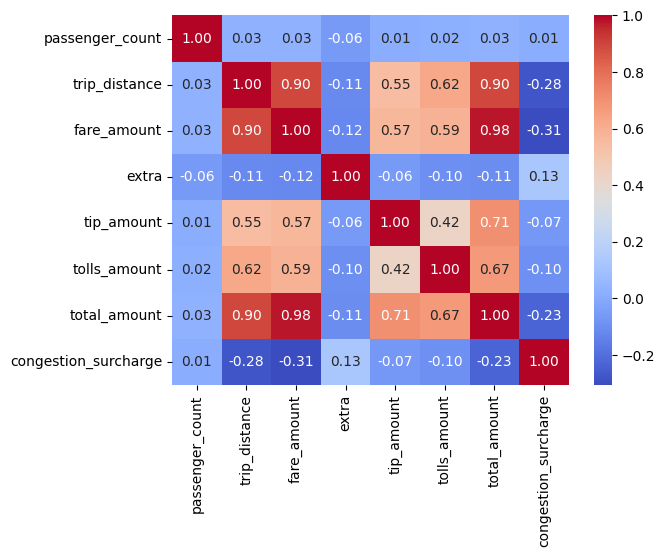

In [61]:
sns.heatmap(df[['passenger_count','trip_distance','fare_amount',
    'extra','tip_amount','tolls_amount','total_amount',
   'congestion_surcharge']].corr(),annot=True,cmap='coolwarm', fmt=".2f");

1. The correlation reveals that there is a weak positive correlation between passenger count and fare amount, tip amount, and total amount. This weak positive correlation suggests there is little to no linear relationship between passenger count and these monetary variables, indicating that the number of passengers is unlikely to significantly influence fare, tip, or total amount.

2. There is a strong positive correlation observed between trip distance and fare amount, tip amount, total amount, and tolls amount. The strong positive correlation implies that as the trip distance increases, so do the fare amount, tip amount, and total amount. This is intuitive, as longer trips typically incur higher fares and consequently higher tips, leading to an overall increase in the total amount paid.

3. Payment type exhibits a strong negative correlation with tip proportion and fare proportion. The strong negative correlation indicates that certain payment types are associated with lower tip and fare proportions. This could suggest that customers who choose certain payment methods may be less inclined to leave tips or may be more price-sensitive, resulting in lower proportions of tips and fares relative to the total amount paid.

We would like to provide some visual representations that can complement some of the results from the correlation table we just presented. First, we will look at the relationship between trip distance and total amount paid. We can see that overall, there is a strong positive relationship between total amount paid and trip distance, a rather intuitive outcome. However, we can see an array of points that deviate considerably from this result, where we either have those who pay more for a shorter trip vs. those who pay less for considerably longer trips. Initial observations suggest that this can be attributed to different rate codes or different types of surcharges.

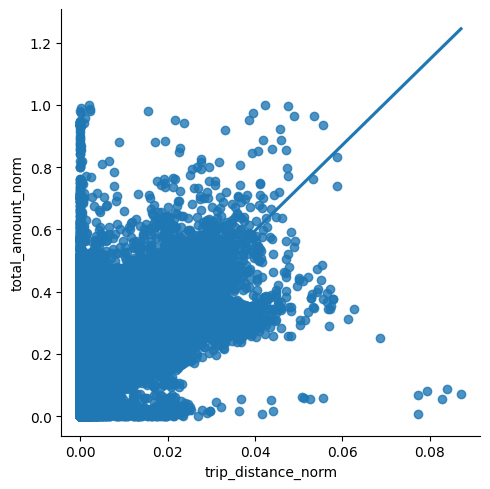

In [62]:
# .loc filters are imposed to mitigate "visual outliers" that affect the quality of the visualization
# note that due to computational constraints and time efficiency, a sample of the dataframe is imposed
sns.lmplot(df.sample(frac=.1).loc[(df.total_amount_norm<2)&(df.trip_distance_norm<0.1),],
           x='trip_distance_norm',y='total_amount_norm');

Next, we will be looking at how tip varies with fare paid. Note that this is different from total amount paid, as the latter includes surcharges, tax, and other potential payments. Tips are highly correlated with fares, as they are paid as a percentage of the subtotal.

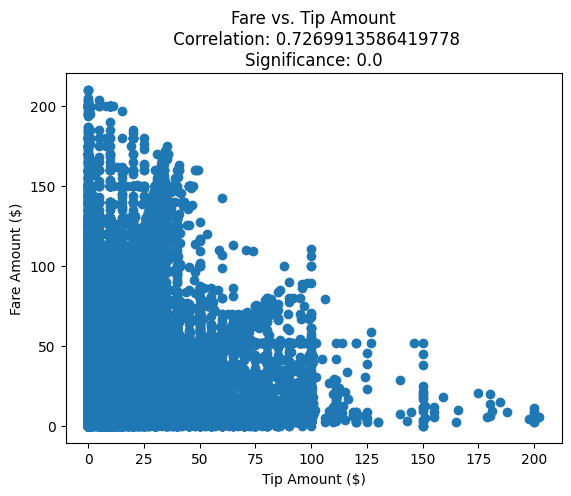

In [63]:
# we will be only considering rides paid with a credit card as tips are only reflected with credit card payments
plt.scatter(df.loc[df.payment_type==1,'tip_amount'].values,
            df.loc[df.payment_type==1,'fare_amount'].values)
plt.title('Fare vs. Tip Amount\n Correlation: '+str(stats.pearsonr(df.loc[df.payment_type==1,:].tip_amount,
                                                                   df.loc[df.payment_type==1,:].fare_amount)[0])+
          '\nSignificance: '+str(stats.pearsonr(df.loc[df.payment_type==1,:].tip_amount,
                                                df.loc[df.payment_type==1,:].fare_amount)[1]))
plt.xlabel('Tip Amount ($)')
plt.ylabel('Fare Amount ($)')
plt.show()

#### 3.2) Fare Distribution

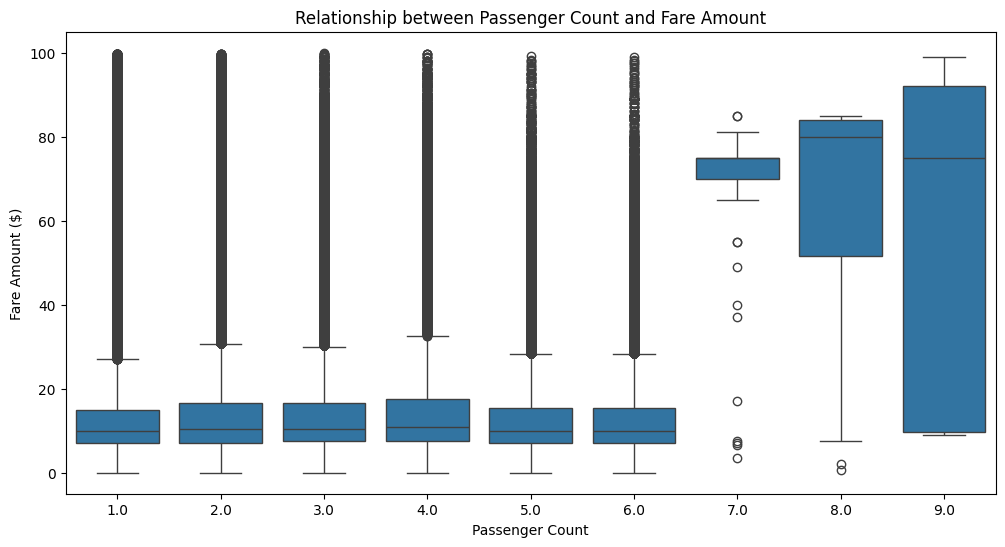

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(df.loc[df.fare_amount<100],x='passenger_count',y='fare_amount')
plt.title('Relationship between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

The boxplot illustrates that there isn't a discernible relationship between passenger count and fare amount, aside from an additional fee for groups larger than 7 people. This suggests that, in general, the number of passengers does not significantly correlate with the fare amount (and consequently trip distance as the two go hand-in-hand for the most part). However, the observed additional fee for larger groups could suggest that travel needs are different for much larger groups compared to smaller ones. Another potential explanation is the fact that smaller groups associate with more consistent types of trips, while larger groups (which are less frequent) are more susceptible to more "special" occasions.

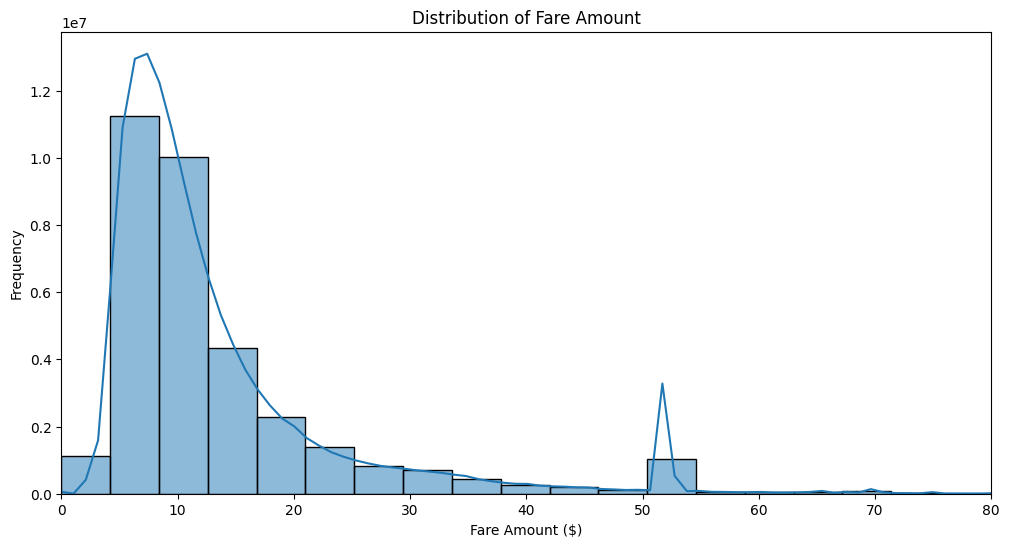

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(df['fare_amount'], bins=50,kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 80)  
plt.show()

In [66]:
# skew test
stats.skewtest(df.fare_amount) 

SkewtestResult(statistic=3568.753671037847, pvalue=0.0)

The histogram depicting fare amounts provides insight into the fare ranges paid by passengers for their trips. It reveals that the majority of fares fall within the 0 to 20 dollar range, suggesting that most trips have relatively low fares and the distribution resembles that of a log-normal one. A simple skew test shows how this is the case. This is a common observation in taxi or ride-sharing services, where short-distance trips are prevalent. However, There is a noticeable frequency of around 50 dollars, indicating a commonly used fixed fare, possibly for high-demand long-distance routes such as airport trips. This suggests that a significant number of passengers opt for this service at a uniform price point. It can be more examined when the distribution is grouped by the borough.

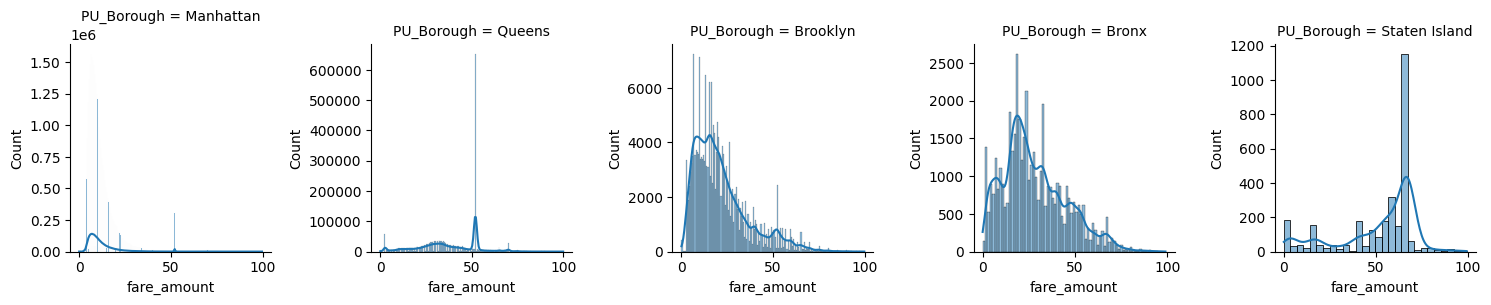

In [67]:
sns.FacetGrid(df.loc[df.fare_amount<100],col='PU_Borough',
              sharex=False,sharey=False).map(sns.histplot,'fare_amount',kde=True);

Distinguishing fare frequency by borough, we can see that the spike we saw at around the $50 fare point is attributed to Queens and Staten Island, while Manhattan, Brooklyn, and the Bronx  follow similar distributions to each other. As a spoiler, we will see that yellow taxi trips are highly "Manhattan-centric." In other words, they follow activity around the busiest borough. Following this, an explanation to the high frequency of more expensive trips in Queens and Staten Island could be the fact that they are more distant from busier parts of the city (this is just a hypothesis that serves as a side note).

Statistical tests can help comfirm visual observations that we have see n from these preliminary charts. Although it is quite obvious that Queesn and Staten Island have different means from Manhattan, the same is not readily visible between Manhattan, Brooklyn and the Bronx. A one way Analysis of Variance (ANOVA) test and a Kolmogorov-Smirnov test help see as to whether the means and the distributions are fundamentally different, respectively. Test results show that all three boroughs share different means, and are also derived from different distributions.

In [68]:
# anova analysis
stats.f_oneway(df.loc[df.PU_Borough=='Manhattan','fare_amount'],
               df.loc[df.PU_Borough=='Brooklyn','fare_amount'],
               df.loc[df.PU_Borough=='Bronx','fare_amount'])

F_onewayResult(statistic=243055.59538574654, pvalue=0.0)

In [69]:
# independent t-test between Brookly and Bronx fare amounts
stats.ttest_ind(df.loc[df.PU_Borough=='Brooklyn','fare_amount'],
               df.loc[df.PU_Borough=='Bronx','fare_amount'])

TtestResult(statistic=-81.42584650995904, pvalue=0.0, df=251256.0)

In [70]:
# kolmogorov-smirnoff test
stats.ks_2samp(df.loc[df.PU_Borough=='Manhattan','fare_amount'],
              df.loc[df.PU_Borough=='Brooklyn','fare_amount'])

KstestResult(statistic=0.4023347467764521, pvalue=0.0, statistic_location=15.03, statistic_sign=1)

In [71]:
stats.ks_2samp(df.loc[df.PU_Borough=='Manhattan','fare_amount'],
              df.loc[df.PU_Borough=='Bronx','fare_amount'])

KstestResult(statistic=0.5914405236834693, pvalue=0.0, statistic_location=15.19, statistic_sign=1)

#### 3.3) Cross-Borough Analysis 

Further extensions to the immediately preceding analysis could be how boroughs differ in ride components. Below are the average passenger counts, fare amounts, tip, and trip distance by borough.

Text(0, 0.5, 'Tip ($)')

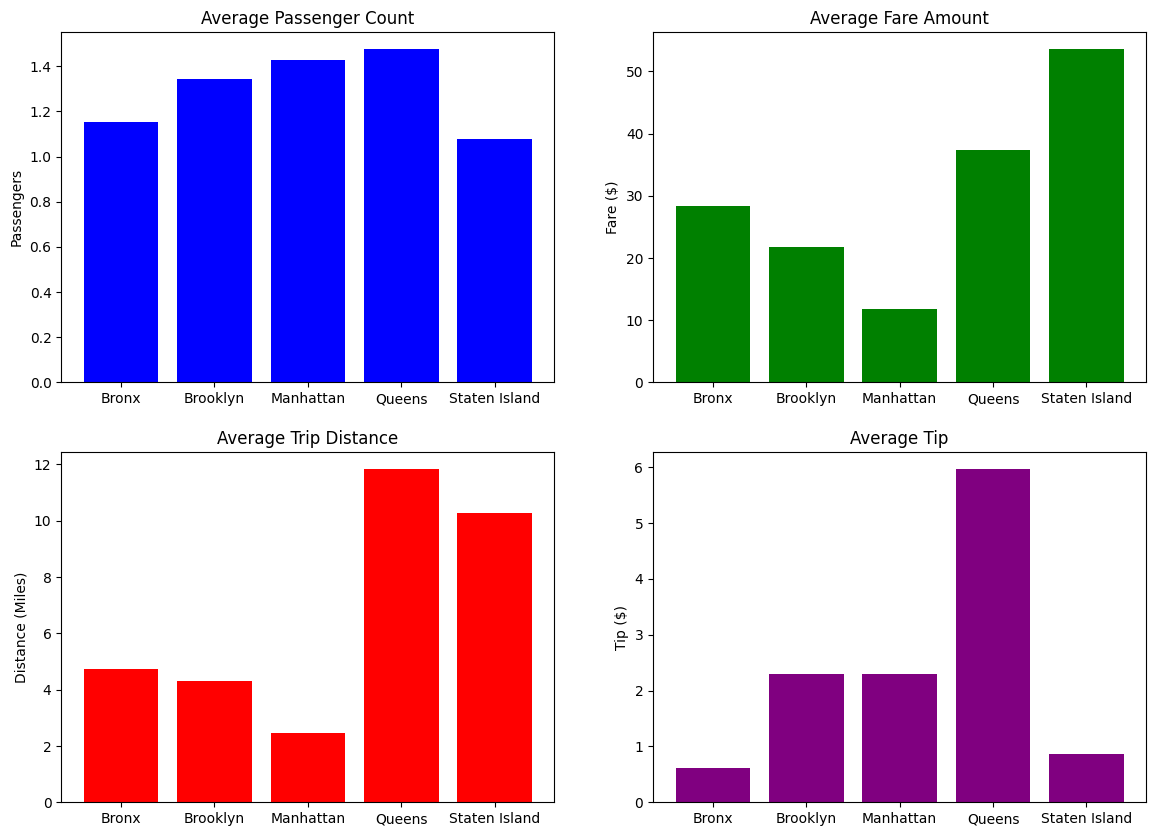

In [72]:
dfBorough=df[['passenger_count','fare_amount','trip_distance','tip_amount','PU_Borough']].groupby('PU_Borough').mean()


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(14,10))

ax1.bar(dfBorough.index,dfBorough.iloc[:,0].values,color='blue')
ax1.set_title('Average Passenger Count')
ax1.set_ylabel('Passengers')

ax2.bar(dfBorough.index,dfBorough.iloc[:,1].values,color='green')
ax2.set_title('Average Fare Amount')
ax2.set_ylabel('Fare ($)')


ax3.bar(dfBorough.index,dfBorough.iloc[:,2].values,color='red')
ax3.set_title('Average Trip Distance')
ax3.set_ylabel('Distance (Miles)')

ax4.bar(dfBorough.index,dfBorough.iloc[:,3].values,color='purple')
ax4.set_title('Average Tip')
ax4.set_ylabel('Tip ($)')

Although passenger counts for rides performed from each borough are relatively similar, there is a divergence in the average trip distance and average fare amount.

Following this is also a pie chart on the proportion of what is paid for each trip by borough. Note that tax and airport fee is dropped as tax is levied at a flat rate, and airport fees really only apply to one borough so it is not relevant for comparison. Manhattan being the busiest borough has the highest proportion of congestion surcharge paid for on average, while more distant boroughs in Staten Island and Queens have a larger proportion of 

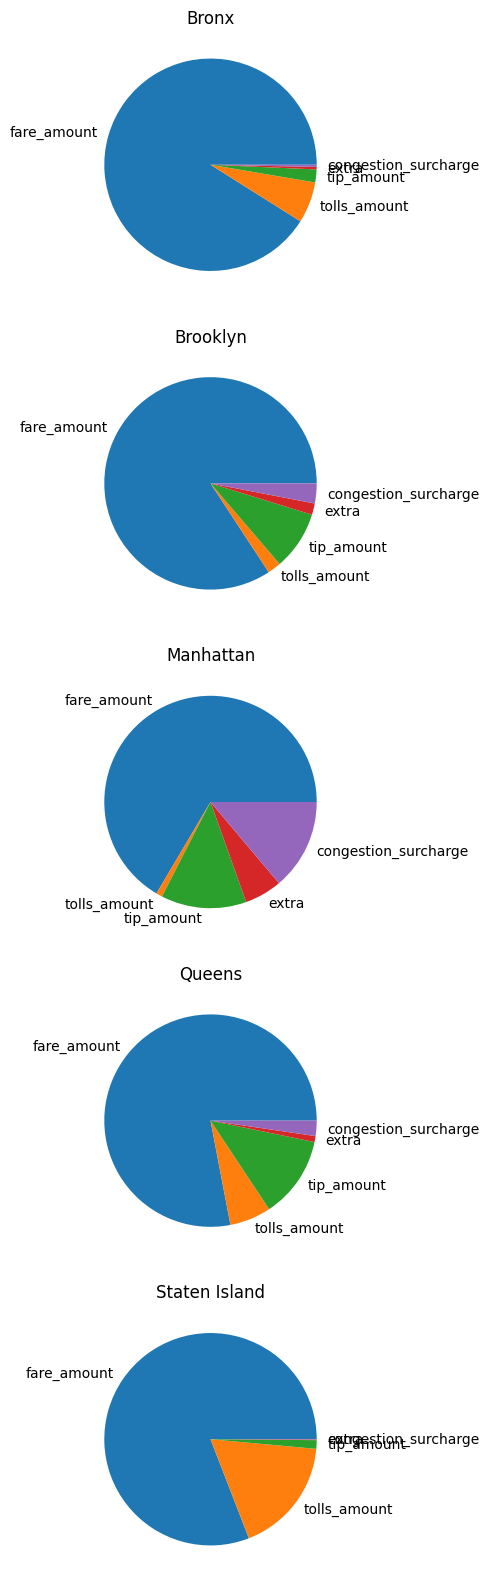

In [73]:
tmp=df[['fare_amount','tolls_amount','tip_amount',
    'extra','congestion_surcharge','PU_Borough']].groupby('PU_Borough').mean()
    

fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(40,20))

ax1.pie(tmp.iloc[0,:].values,labels=tmp.iloc[0,:].index)
ax1.set_title('Bronx')
ax2.pie(tmp.iloc[1,:].values,labels=tmp.iloc[1,:].index)
ax2.set_title('Brooklyn')
ax3.pie(tmp.iloc[2,:].values,labels=tmp.iloc[2,:].index)
ax3.set_title('Manhattan')
ax4.pie(tmp.iloc[3,:].values,labels=tmp.iloc[3,:].index)
ax4.set_title('Queens')
ax5.pie(tmp.iloc[4,:].values,labels=tmp.iloc[4,:].index)
ax5.set_title('Staten Island')
plt.show()

Now, we will observe the most popular routes performed in 2022 by looking at the most popular routes performed, the most popular pickup zones, and the most popular dropoff zones.

In [74]:
# Create a column that groups routes together
df['route']=df.loc[:,'PU_Zone']+ '-' +df.loc[:,'DO_Zone']

In [75]:
df.groupby('route').size().sort_values(ascending=False).head(10)

route
Upper East Side South-Upper East Side North    247694
Upper East Side North-Upper East Side South    209071
Upper East Side South-Upper East Side South    165147
Upper East Side North-Upper East Side North    156581
Upper East Side South-Midtown Center           108668
Midtown Center-Upper East Side South            98983
Lincoln Square East-Upper West Side South       94084
Upper West Side South-Lincoln Square East       92396
Upper West Side South-Upper West Side North     89566
Midtown Center-Upper East Side North            88151
dtype: int64

In [76]:
df.groupby('PU_Zone').size().sort_values(ascending=False).head(10)

PU_Zone
Upper East Side South           1696398
Upper East Side North           1504461
Midtown Center                  1459385
JFK Airport                     1427449
Penn Station/Madison Sq West    1214122
Lincoln Square East             1196994
Midtown East                    1192238
Times Sq/Theatre District       1124311
Murray Hill                     1116595
Clinton East                    1108676
dtype: int64

In [77]:
df.groupby('DO_Zone').size().sort_values(ascending=False).head(10)

DO_Zone
Upper East Side North        1521180
Upper East Side South        1466563
Midtown Center               1313977
Murray Hill                  1062824
Times Sq/Theatre District    1036764
Upper West Side South         989127
Lincoln Square East           987225
Clinton East                  957811
Midtown East                  950960
Lenox Hill West               916850
dtype: int64

By the aforementioned, "Manhattan-centric," we can see that the most popular boroughs where yellow taxi trips are performed around Manhattan, mainly in neighborhoods in midtown and in the Upper East Side. This can be attributed to the fact that yellow taxis are potentially a "normal good" in transportation, where those with higher immediate disposable income (e.g. tourists, high income individuals) may pursue such rides more while other may opt for subways or buses.

We can also say that rides are not just limited to within the borough where it starts. It is very possible that someone starts a trip without staying in the same borough. Understandably, we can see that cross borough trips have higher average total amount paid per trip, which can be associated with surcharges and extra fees levied from tolls, the fact that cross borough trips are more likely to be of a longer distance, etc.

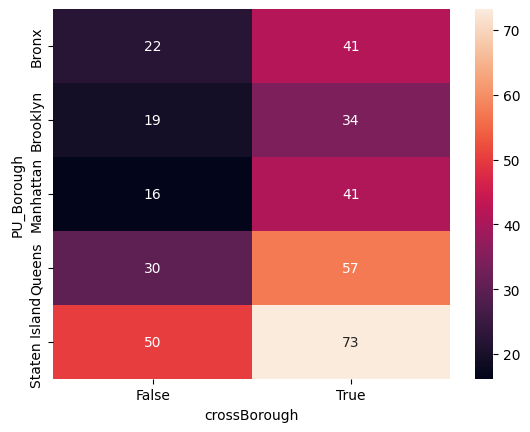

In [78]:
sns.heatmap(df.pivot_table(index='PU_Borough',columns='crossBorough',values='total_amount'),annot=True);

## 4) Data Analysis & Data Visualization <br>
In this portion of the project, we will be looking at pertinent questions that arise from the dataset and can be answered from simple operations performed on the dataset. Questions that are primarily answered through leveraging data visualizations will complement these findings as well. Due to the size of the dataset that we are using, visualizations will primarily be done through matplotlib plots.

### 4.1)  Taxi Ride-Volume Analysis<br>

In this following section, we will be considering a time-series analysis of ridership across different seasons, days of the week, and weather considerations. We will be investigating some trends in taxi ride volume that can serve as the basis for the subsequent analyses that we will be performing. In doing an analysis on the time-series data that we have, we can make the following distinctions.

As a preliminary, we will first look at general taxi ride volume throughout 2022. The purpose of this is to establish an overall picture as to how riders use Yellow Taxis. First we will try to see if there is evidence of seasonality. One easy way to check for this is by using a Dickey-Fuller test that test the presence of a unit root in the data. Documentation on the following test statistic is provided below: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

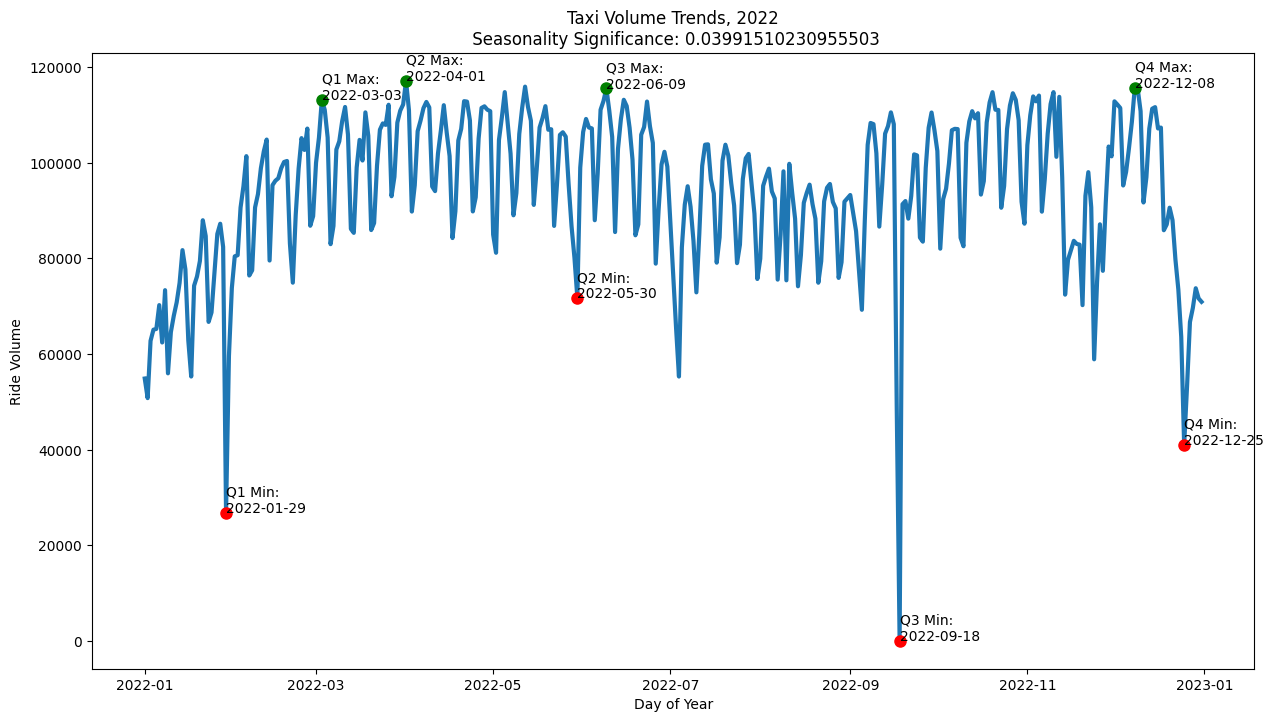

In [79]:
from statsmodels.tsa.stattools import adfuller

plt.figure(figsize=(15,8))
plt.title('Taxi Volume Trends, 2022\n Seasonality Significance: '+
          str(adfuller(df.groupby('ride_date').size().values)[1]))
plt.xlabel('Day of Year')
plt.ylabel('Ride Volume')
plt.plot(df.groupby('ride_date').size().index,
         df.groupby('ride_date').size().values,
        linewidth=3)

# for-loop plotting each min and max volume for each quarter
for i in df.quarter.unique():
    tmp=df.loc[df.quarter==i,:].groupby('ride_date').size() # grouped by quarters
    
    minval=np.min(tmp.values)
    minloc=np.argwhere(tmp.values==minval)[0][0]
    mindate=tmp.index[minloc]
    plt.plot(mindate,minval,marker='o',markersize=8,color='red')
    plt.text(mindate,minval,i+' Min: \n'+str(mindate))
    
    maxval=np.max(tmp.values)
    maxloc=np.argwhere(tmp.values==maxval)[0][0]
    maxdate=tmp.index[maxloc]
    plt.plot(maxdate,maxval,marker='o',markersize=8,color='green')
    plt.text(maxdate,maxval,i+' Max: \n'+str(maxdate))

# print days with lowest volume for each quarter

As we can see, there is significant variability across rides visually. The Augmented Dickey-Fuller test confirms that this variability is statistically significant. We can see that for each quarter there tends to be a trend where maximum volume in the period is achieved at the beginning of the month and minimum volume is achieved towards the end of the month. We can see that throughout the year, the path of seasonality tends to be rather consistent and periodic, besides the last couple of weeks in the year which can be associated with the holiday season (i.e. Thanksgiving, Christmas). The next couple of charts will delve into precisely how seasonality might occur across rides.

Next, we will be observing periodic changes in ride volume across more granular measures of time, namely by hour and by day of the week.

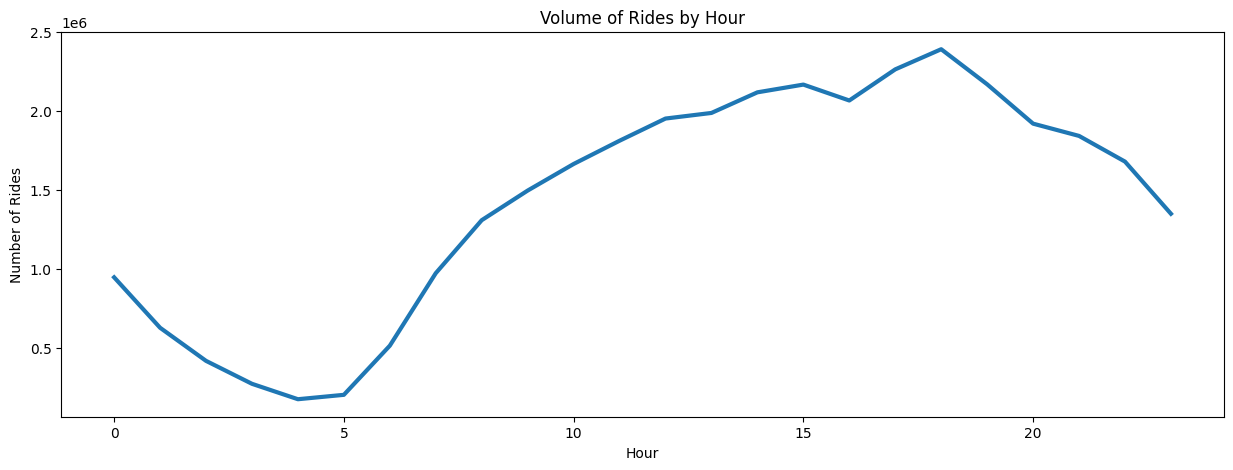

In [80]:
plt.figure(figsize=(15,5))
plt.title('Volume of Rides by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.plot(df.groupby('ride_hour').size().index,df.groupby('ride_hour').size().values,linewidth=3)
plt.show()

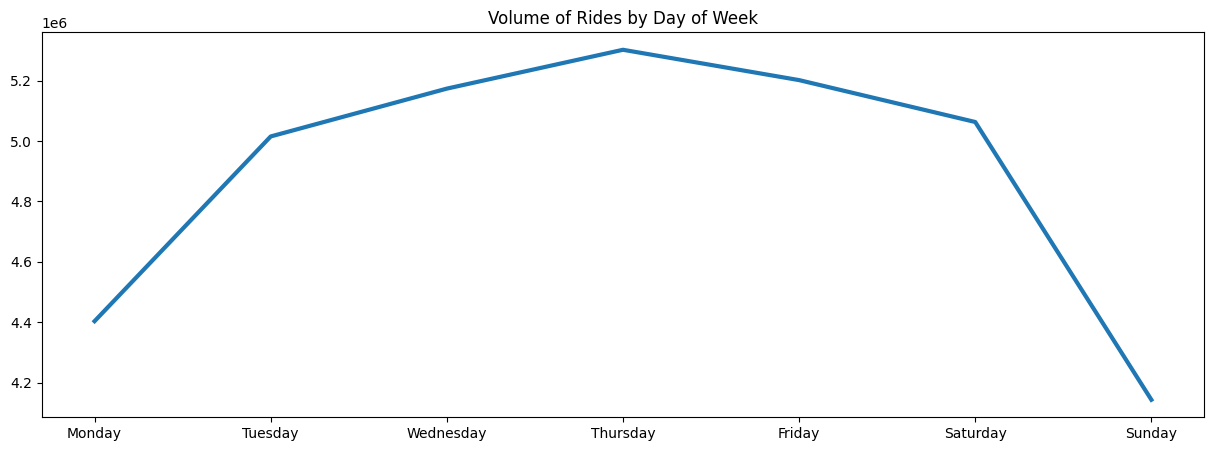

In [81]:
dayMap={
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
} # mapping dict for day of week sorting

tmpday=pd.DataFrame(df.groupby('ride_day_name').size())
tmpday['day_index']=tmpday.index.map(dayMap)
tmpday=tmpday.sort_values(by='day_index')
tmpday

plt.figure(figsize=(15,5))
plt.title('Volume of Rides by Day of Week')
plt.plot(tmpday.index,tmpday.iloc[:,0],linewidth=3)
plt.show()

Our data seems to "behave well" in-line with intuition. Ride volume by hour exhibits a sinusoidal pattern, where rides are lowest in late night/dawn and crawl up over the day. We can see that peak hour of ride volume is exhibited at the end of working hours, and then declines throughout the night again. Volume of rides by day of the week also shows a complementary story. Ride volume is higher throughout the weekdays, and then declines on Sunday and Saturday. While the plot on hours is more readily intuitive, the observations from the day of the week plot may not. The fact that ride volumes are highest during the work week may imply that yellow taxi ridership may be correlated with the work day. Because of the downsides with other public transportation routes (e.g. timing, delays, etc.), and because people have lower propensity to wait for their mode of transportation during the work day, it may be the case that ride volume is highest during the weekdays.

To more vividly show these observations, we will see if there's a significant difference between weekend and weekday trips, also based on the hour of day for trip distances and total amounts. Note that we will disregard holidays, for now. For better computations, let us convert our `ride_hour` column to represent different phases of the day (e.g. morning, afternoon, etc.). We will apply these labels based on the following source: https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc <br> <br>
We can see that on the weekdays, night trips show the highest trip distance traveled and are substantially higher than trips at other times of the day. We can see that the distance traveled declines over the week, and trip distances become more similar over the weekend. When it comes to ride volume by time of day, however, we can see that the trend is more consistent, with afternoon rides being of the highest demand across all days. Time of day also does not have a significant impact on the distribution of the total amount paid per trip, as they are all concentrated around in a similar manner.

In [82]:
# allow ride_hour column to reflect parts of the day
df['ride_hour']=df['ride_hour'].map({0:'Night',1:'Night',2:'Night',3:'Night',4:'Night',
                                    5:'Morning',6:'Morning',7:'Morning',8:'Morning',9:'Morning',
                                    10:'Morning',11:'Morning',12:'Afternoon',13:'Afternoon',14:'Afternoon',
                                    15:'Afternoon',16:'Afternoon',17:'Afternoon',18:'Evening',19:'Evening',
                                    20:'Evening',21:'Evening',22:'Night',23:'Night'})

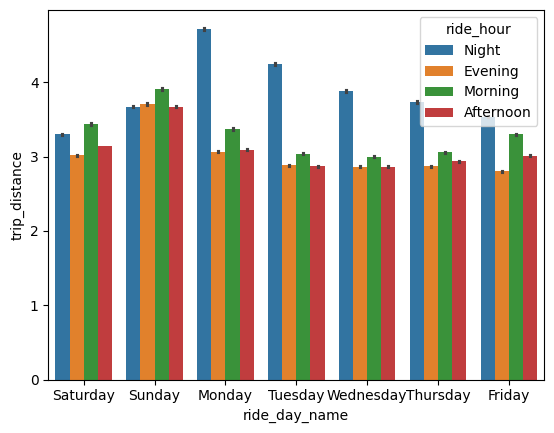

In [83]:
sns.barplot(df,x='ride_day_name',y='trip_distance',hue='ride_hour');

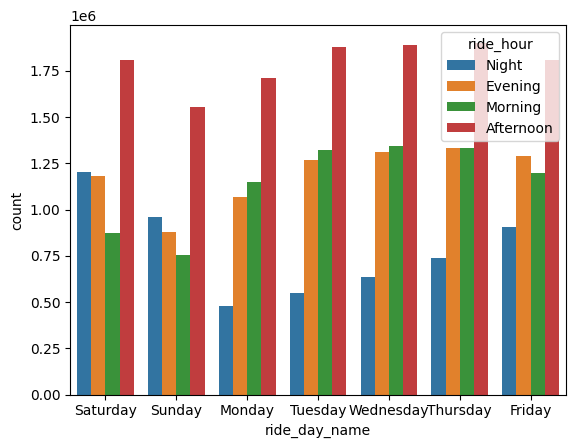

In [84]:
sns.countplot(df,x='ride_day_name',hue='ride_hour');

In [85]:
for i in df.ride_hour.unique():
    plt.boxplot(df.loc[df.ride_hour==i,:].groupby('ride_date').agg({'total_amount':'mean'}),label=i,alpha=0.5)
plt.legend(loc=1)
plt.title('Total Amount Paid by Time of Day - Distribution')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'label'

We will now test the notion as to whether we see different tendencies in ridership across weekdays and the weekend. This is a logical progression from the previous visualizations that we have seen, as it is evident that trends in ridership follow activity related to the work day. This can be an insightful application into understanding how riders potentially behave between days on work and days on leisure.  Overall, it seems that there is a higher frequency of 100K+ ride days on the weekday in comparison to the weekend. This substantiates the common theme that yellow taxi ridership is reflective of activity around the city, with a higher emphasis on the weekday.

In [ ]:
### statistically significant between weekend or not?
weekdaysamp=df.loc[df.tpep_pickup_datetime.dt.dayofweek<5,:]
weekendsamp=df.loc[df.tpep_pickup_datetime.dt.dayofweek>4,:]

In [ ]:
plt.hist(weekdaysamp.groupby('ride_date').size().values,alpha=0.5,label='Weekday')
plt.hist(weekendsamp.groupby('ride_date').size().values,alpha=0.5,label='Weekend')
plt.legend(loc=0)
plt.title('Distribution of Ride Volume, Weekend vs. Weekday')
plt.xlabel('Number of Rides (Day)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# independent t-test in ride volume mean between weekend and weekday
stats.ttest_ind(weekdaysamp.groupby('ride_date').size(),weekendsamp.groupby('ride_date').size())

In [ ]:
# kolmogorov-smirnov test between distributions of ride volume between weekend and weekday
stats.ks_2samp(weekdaysamp.groupby('ride_date').size(),weekendsamp.groupby('ride_date').size())

Trip distance averages and total amount paid averages also differ by weekday and weekend with statistical significance, but in absolute terms the magnitude is not considerably high.

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(['Weekday','Weekend'],
        [weekdaysamp.trip_distance.mean(),weekendsamp.trip_distance.mean()])
ax1.set_title('Average Trip Distance by Weekday/Weekend')
ax1.set_ylabel('Average Trip Distance (Miles)')

ax2.bar(['Weekday','Weekend'],
        [weekdaysamp.total_amount.mean(),weekendsamp.total_amount.mean()])
ax2.set_title('Average Total Paid Amount by Weekday/Weekend')
ax2.set_ylabel('Amount ($)')

In [ ]:
stats.ttest_ind(weekdaysamp.trip_distance,weekendsamp.trip_distance)

In [ ]:
stats.ttest_ind(weekdaysamp.total_amount,weekendsamp.total_amount)

Overall, we can see evidence for seasonality in yellow taxi ridership across seasons, weekday/weekend, and time of day.

#### 4.2) External Factors: Weather

Now, we will look at the extent to which weather accounts for We hypothesize that weather, particularly weather conditions that make conditions more adverse to staying outside (cold, windy, rainy, snowy) are correlated with higher ride counts, higher distance traveled, and overall indicate that riders are more inclined to take taxi trips regardless of occasion.

In [ ]:
# scale values such that correlation between the two is more visible
corr1=stats.pearsonr(df.groupby('ride_date').size().values,dfWeather.tavg)

plt.figure(figsize=(15,5))
plt.title('Taxi Volume and Average Temperature (Celsius)\nCorrelation: '+
          str(corr1[0])+'\nSignificance: '+str(corr1[1]))
plt.xlabel('Day of Year')
plt.ylabel('Ride Volume')
plt.plot(df.groupby('ride_date').size().index,
         skp.MinMaxScaler().fit_transform(df.groupby('ride_date').size().values.reshape(-1,1)),
        linewidth=3,label='Ride Volume')
plt.plot(df.groupby('ride_date').size().index,
         skp.MinMaxScaler().fit_transform(dfWeather['tavg'].values.reshape(-1,1)),
         linewidth=3,label='Avg. Temperature')
#plt.xticks([])
plt.legend(loc=0)
plt.show()

The provided graph illustrates a not strong positive correlation between taxi ride volume and average temperature over a year, with a correlation coefficient of approximately 0.190 and a statistically significant p-value of 0.00025. Despite the weak correlation, the significance suggests a consistent slight influence of temperature on taxi ride volume. Thus, it's statistically reliable, suggesting that temperature changes, among other factors, should be considered when modeling taxi demand.

In [ ]:
# scale values such that correlation between 
corr2=stats.pearsonr(df.groupby('ride_date').size().values,dfWeather.wspd.fillna(0))
plt.figure(figsize=(15,5))
plt.title('Taxi Volume and Average Wind Speed (KM/H)\nCorrelation: '+
          str(corr2[0])+'\nSignificance: '+str(corr2[1]))
plt.xlabel('Day of Year')
plt.ylabel('Ride Volume')
plt.plot(df.groupby('ride_date').size().index,
         skp.MinMaxScaler().fit_transform(df.groupby('ride_date').size().values.reshape(-1,1)),
        linewidth=3,label='Ride Volume')
plt.plot(dfWeather['date'],
         skp.MinMaxScaler().fit_transform(dfWeather['wspd'].values.reshape(-1,1)),linewidth=3,
        color='red',label='Avg. Wind Speed')
plt.legend(loc=0)
plt.show()

The analysis of the relationship between taxi ride volume and average wind speed, as depicted in the provided graph, shows a very weak correlation with a coefficient of approximately 0.063 and a statistically insignificant p-value of about 0.230. This suggests almost weak linear relationship between wind speed and taxi ride volume, indicating that variations in wind speed have negligible influence on taxi usage. The lack of statistical significance further implies that any observed correlation is likely due to random chance rather than an actual underlying relationship, suggesting that wind speed is not a useful predictor for taxi demand. This insight can guide transportation service providers to focus on other weather conditions like precipitation to be more relevant factors to explore for impacts on transportation services.

In [ ]:
corr3=stats.pearsonr(df.groupby('ride_date').size().values,dfWeather.prcp)
plt.figure(figsize=(15,5))
plt.title('Taxi Volume and Precipitation (MM)\nCorrelation: '+
          str(corr3[0])+'\nSignificance: '+str(corr3[1]))
plt.xlabel('Day of Year')
plt.ylabel('Ride Volume')
plt.plot(df.groupby('ride_date').size().index,
         skp.MinMaxScaler().fit_transform(df.groupby('ride_date').size().values.reshape(-1,1)),
        linewidth=3,label='Ride Volume')
plt.plot(dfWeather['date'],
         skp.MinMaxScaler().fit_transform(dfWeather['prcp'].values.reshape(-1,1)),linewidth=3,
        color='green',label='Precipitation')
plt.legend(loc=0)
plt.show()

The analysis of the relationship between taxi ride volume and precipitation over a year reveals a very weak inverse correlation with a coefficient of -0.060 and a statistically insignificant p-value of approximately 0.249. These numbers suggest that while there is a slight tendency for taxi ride volume to decrease with increasing precipitation, the effect is extremely weak and not statistically supported. Consequently, precipitation appears to be a non-correlative element with respect to taxi demand. For transportation service providers and urban planners, this insight emphasizes the importance of not relying on intuitive assumptions such as precipitation increasing taxi usage. Given this non-correlation, it's statistically reasonable to consider precipitation as a less significant factor when modeling taxi demand.

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.scatter(dfWeather['tavg'],df.groupby('ride_date').size().values,color='orange')
ax1.set_title('Ride Volume and Avg. Temperature')
ax1.set_xlabel('Avg. Temperature (Celsius)')
ax1.set_ylabel('Ride Volume')
ax2.scatter(dfWeather['wspd'],df.groupby(['ride_month','ride_day']).size().values,
            color='orange')
ax2.set_title('Ride Volume and Avg. Wind Speed')
ax2.set_xlabel('Wind Speed (KM/H)')
plt.show()

In [ ]:
# 3d chart between prcp, windspeed, ride volume
ax=plt.axes(projection = '3d')
x=dfWeather['wspd'].values
y=dfWeather['tavg'].values
z=df.groupby(['ride_month','ride_day']).size().values
ax.scatter(x,y,z,color='orange',alpha=0.5)
ax.set_xlabel('Wind Speed (KM/H)')
ax.set_ylabel('Temperature (Celsius)')
ax.set_zlabel('Ride Volume')
ax.set_title('Daily Ride Volume vs. Avg. Wind Speed and Avg. Temperature')
plt.show()

Combining the insights from the two-dimensional scatter plots on ride volume versus average temperature and ride volume versus average wind speed into a 3D scatter plot provides a more comprehensive perspective on how these environmental variables interact to affect taxi demand. In the individual 2D plots, we see indications of possible relationships: ride volume seems to increase with warmer temperatures, and interestingly, there appears to be a tendency for higher ride volumes at lower wind speeds. By integrating these dimensions into a 3D visualization, we can simultaneously see the effect of both temperature and wind speed on ride volume. This holistic approach can uncover interaction effects between the variables and offer a better understanding of the factors that possibly impact taxi demand. This insight is valuable for further statistical analysis and our predictive modeling.

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(dfWeather['tavg'],df.groupby(['ride_month','ride_day']).agg({'trip_distance':['mean']}).values,color='red')
ax1.set_title('Trip Distance and Avg. Temperature')
ax1.set_xlabel('Avg. Temperature (Celsius)')
ax1.set_ylabel('Ride Volume')
ax2.scatter(dfWeather['wspd'],df.groupby(['ride_month','ride_day']).agg({'trip_distance':['mean']}).values,color='red')
ax2.set_title('Ride Volume and Avg. Wind Speed')
ax2.set_xlabel('Wind Speed (KM/H)')
plt.show()

In [ ]:
ax=plt.axes(projection = '3d')
x=dfWeather['wspd'].values
y=dfWeather['tavg'].values
z=df.groupby(['ride_month','ride_day']).agg({'trip_distance':['mean']}).values
ax.scatter(x,y,z,color='red',alpha=0.5)
ax.set_xlabel('Wind Speed (KM/H)')
ax.set_ylabel('Temperature (Celsius)')
ax.set_zlabel('Trip Distance (Miles)')
ax.set_title('Daily Avg. Trip Distance vs. Avg. Wind Speed and Avg. Temperature')
plt.show()

Combining the insights from two-dimensional scatter plots on trip distance versus average temperature and trip distance versus average wind speed into a 3D scatter plot provides a richer understanding of how these environmental variables interact to influence taxi usage in terms of trip distance. In the individual 2D plots, we observe a slight association suggesting that trip distances might increase slightly with higher temperatures and show no clear pattern with wind speed. By integrating these dimensions into a 3D visualization, we can simultaneously analyze the combined effect of both temperature and wind speed on trip distances.

The next logical step would be to perform statistical tests on whether there is a statistically significant difference in days that have more adverse weather outcomes. We can already see an inverse correlation between average temperatures and ride volume, so it might be that more extreme weather leads to people demanding taxi rides regardless of condition proxied through the standard deviation/distribution of ride distances. We will be conducting a chisquare test to see if the distribution in ride distances, which will serve as a proxy to our question, is statistically significant between extreme and non-extreme temperatures. For this analysis, we will be using a Kolmogorov-Smirnov test to see if the distributions are different. As a more technical note, we will define "extreme" temperatures as anything below freezing, 0-Celsius or anything above 32-Celsius.<br><br>
Our results show that although the distribution and means are different with statistical significance, they are quite close to one another. One difference we can see is that there seems to be a higher concentration of longer trip distances when it comes to non-extreme weather. A potential explanation for this trend is that people are more inclined to venture out further when the weather is more desirable, and hence distances in taxi trips reflect this trend.

In [ ]:
# denote a binary column for temperatures below freezing and temperature above 32
dfWeather['xtrmt']=['Extreme' if (i<0.0 or i>32.0) else 'Not Extreme' for i in dfWeather.tavg]

# we will use this to map values into original dataframe df
mappingDictXtrmt={}
for i in dfWeather['date'].values:
    mappingDictXtrmt[i]=dfWeather.loc[dfWeather.date==i,'xtrmt'].values[0]

df['xtrmt']=df['ride_date'].map(mappingDictXtrmt)

In [ ]:
stats.ttest_ind(df.loc[df.xtrmt=='Extreme','trip_distance'],df.loc[df.xtrmt=='Not Extreme','trip_distance'])

In [ ]:
stats.ks_2samp(df.loc[df.xtrmt=='Extreme','trip_distance'],df.loc[df.xtrmt=='Not Extreme','trip_distance'])

In [ ]:
# like earlier, we will have to exclude some entries while making the visualizations as there are more visual outliers
# that do not make distribution visualizations feasible with the full dataset
sns.histplot(df.loc[df.trip_distance<40],x='trip_distance',hue='xtrmt',bins=50,kde=True);

Now, one of the ultimate objectives of this project is to understand ridership and one particular aspect is to gauge demand for Yellow Taxis. We will be performing a regression analysis on ride volume with respect to average temperature on a given day. Because precipitation and average wind speed have minimal correlative relation with ride volume, these variables will be excluded. Because we previously saw how weekday/weekend can influence ride volume, we can also impose these as controls for a more accurate representation. We will be fitting a regression analysis not necessarily to predict, but to understand the relationship between the variables, which can be done through the following function: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html, or more of an approach from an econometrics standpoint. Further applications to this analysis can extend to a ride volume prediction model, which will have to involve rides from 

$$ RideVolume_t=\beta_0 + \beta_1 TAVG_t + \beta_2 WEEKEND_t + \mu_t $$

Here, *WEEKEND* denotes a binary variable that takes value 1 when a weekend, or 0 when not.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import learning_curve

In [ ]:
dfols=pd.DataFrame(np.transpose(np.matrix([df.groupby('ride_date').size().values,
                                           dfWeather.tavg.values])),
                   columns=['rides','tavg']).fillna(0) # prepare dataframe for just our ols model
dfols['Weekend']=[1 if i>4 else 0 for i in pd.to_datetime(df.tpep_pickup_datetime.dt.date.unique()).dayofweek]

In [ ]:
x=dfols.iloc[:,1:]
y=dfols.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
weatherModel=linear_model.LinearRegression()
weatherModel.fit(x_train,y_train)

In [ ]:
y_hat=weatherModel.predict(x_test)
m.mean_squared_error(y_test,y_hat)

In [ ]:
m.r2_score(y_test,y_hat)

We can see that our model has only partial explanatory power on ride volume for a given day. As we have seen thus far, yellow taxi ridership is not solely reliant on a set number of factors (e.g. borough, time of day, etc.). Hence, it would make sense for our model to be underfitting given the lack of information. The next step would be to see whether our model does capture an accurate relationship. Here, we will use a standard OLS regression that fits the data to a model rather than just a predictive model.

In [ ]:
import statsmodels.api as sm
x=dfols.iloc[:,1:]
y=dfols.iloc[:,0]
sm.OLS(y,x).fit().summary() 
# just to see the statistical relationship between the variables

We can see that there is a statistically significant relationship between the variables and ride volume, and that the model does capture a decent amount of the variation in its Adjusted R-squared value.

#### 4.3) Geospatial Analysis & Substitution with other Forms of Transportation

One important implication when it comes to public transportation modes is the extent to which different modes are substitutes for each other. New York City has multiple commonly used modes of transportation, the most frequented one being subways. A logical hypothesis to make is that areas with higher densities of subway stations have a less frequencies of rides. NYC Open Data also provides information on the location of the taxi zones: https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc along with information on station information https://data.ny.gov/Transportation/MTA-Subway-Stations/39hk-dx4f/about_data and bus information https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz. The spatial information is provided in a geojson format, which will have to be used in conjunction with some new packages, namely Shapely and geopandas. Because geopandas is derived from pandas, almost all of of the operations will be the same as we would do with pandas, but now considering some newer datatypes. Some supplementary sources used for the visualizations and preprocessing in ths portion is provided below.<br> <br>
Geospatial data plotting inspiration source: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73<br>
Documentation on Shapely Point objects: https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html<br>
Documentation on Geopandas: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html <br>
Documentation on Geopandas set_crs: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html <br>
Documentation on Shapely Polygon objects:
https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
zonesMap=gpd.read_file('NYC Taxi Zones (1).geojson') # taxi pickup and dropoff zones
subwayMap=pd.read_csv('MTA_Subway_Stations_and_Complexes (2).csv')[['Longitude','Latitude']] # subway stations
busMap=gpd.read_file('Bus Stop Shelters.geojson')
# just extract latitude and lon

In [ ]:
zonesMap.head() # show zones data

In [ ]:
subwayMap.head() # show subway station data

In [ ]:
busMap.head()

In [ ]:
# since our locational data is displayed as the coordinate system, we will need to specify this setting in geopandas
# done through crs
# create Point object for each subway station, save to geopandas dataframe
subwayMapGeo=gpd.GeoDataFrame(subwayMap,crs=4326,
                        geometry=[Point(i) for i in subwayMap.values])

First, we would want to transition from our initial visualization on pouplar pickup/dropoff locations in the exploration section and see how this is represented more visually. First, we would like to combine observations from our original dataframe to our geopandas dataframe.

In [ ]:
# get number of pickups and dropoffs for each taxi zone
zonesMap['PU_Count']=zonesMap['zone'].map(dict(df.groupby('PU_Zone').size())) 
zonesMap['DO_Count']=zonesMap['zone'].map(dict(df.groupby('DO_Zone').size()))

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,6))
zonesMap.plot(ax=ax1,column='PU_Count',cmap='Reds')
zonesMap.plot(ax=ax2,column='DO_Count',cmap='Reds')
ax1.set_title('Pickup Count by Taxi Zone')
ax2.set_title('Dropoff Count by Taxi Zone')
plt.show()

We can see that the most popular pickup and drop off areas are in Manhattan, with outliers in Queens (JFK, LaGuardia). In the exploration portion of the project, we already saw that there is considerable discrepancy between borough, so we would like to see how pickups and dropoffs are concentrated based on borough.

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(ncols=5,nrows=1,figsize=(20,5))

# plot each borough separately
zonesMap.loc[zonesMap.borough=='Manhattan',:].plot(ax=ax1,column='PU_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Brooklyn',:].plot(ax=ax2,column='PU_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Queens',:].plot(ax=ax3,column='PU_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Bronx',:].plot(ax=ax4,column='PU_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Staten Island',:].plot(ax=ax5,column='PU_Count',cmap='Reds')

fig.suptitle('Taxi Zones Pickup Heatmaps - By Borough')
ax1.set_title('Manhattan')
ax2.set_title('Brooklyn')
ax3.set_title('Queens')
ax4.set_title('The Bronx')
ax5.set_title('Staten Island')
plt.show()


By segmentation of each borough, we can get more meaningful insights. First, the idea that yellow taxis are gravitating towards Manhattan still holds true, with the most concentrated area for pickups being in the zones closest to Manhattan for Brooklyn and the Bronx, while in Staten Island it is the zones that are neighboring New Jersey. The only outlier here is Queens, where the highest concentration of pickups are in JFK and LaGuardia, which are sensible outcomes.

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(ncols=5,nrows=1,figsize=(20,5))

# plot each borough separately
zonesMap.loc[zonesMap.borough=='Manhattan',:].plot(ax=ax1,column='DO_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Brooklyn',:].plot(ax=ax2,column='DO_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Queens',:].plot(ax=ax3,column='DO_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Bronx',:].plot(ax=ax4,column='DO_Count',cmap='Reds')
zonesMap.loc[zonesMap.borough=='Staten Island',:].plot(ax=ax5,column='DO_Count',cmap='Reds')

fig.suptitle('Taxi Zones Dropoff Heatmaps - By Borough')
ax1.set_title('Manhattan')
ax2.set_title('Brooklyn')
ax3.set_title('Queens')
ax4.set_title('The Bronx')
ax5.set_title('Staten Island')
plt.show()

We can see a slightly different trend when it comes to looking at dropoff data. First, is that dropoff locations, as opposed to pickup locations, are more dispersed. A possible explanation to this is the fact that yellow taxis may be concentrated in only certain parts of the city, which is where there is the most foot traffic. Hence, we see more rides and pickups in Manhattan overwhelmingly than in any other borough.

To answer our overarching question on substitutes with other forms of public transportation, let us transition to observing the distribution of subway stations and bus stops in New York City while considering taxi zone borders.

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

zonesMap.plot(ax=ax1,color='lightblue',edgecolor='black') # plot map with taxi zones
subwayMapGeo.plot(ax=ax1, markersize=5, color='red') # plot subway stations
ax1.set_title('Subway Stations in New York City')

zonesMap.plot(ax=ax2,color='lightblue',edgecolor='black') # plot map with taxi zones
busMap.plot(ax=ax2,markersize=3,color='blue') # plot bus stations
ax2.set_title('Bus Stops in New York City')

plt.show()

We can see that once again, transportation is most concentrated in Manhattan.

To observe the relationship between the effect of public transportation options with yellow taxi ridership, we will take the density of a certain taxi zone's public transportation options. In other words, we will be taking the total number of ride counts and divide by by the map shape's area. Note that the `shape_area` column gives the area of a given taxi zone in map units. The idea will be to then calculate an arbitrary "density" value for each zone and see whether density has a relationship with number of pickups/dropoffs. Note that because `shape_area` values are small, our `density` value will be substantially high in absolute terms, just as a matter of scale.

In [ ]:
# example of mechanism
zonesMap.head()['geometry'][0].contains(subwayMapGeo['geometry'][0])

In [ ]:
# for loop to determine the number of subway stops/bus stops in a given taxi zone
subwayBusCounts={}

for i in zonesMap['location_id'].values:
    subwayBusCounts[i]=0
    for j in subwayMapGeo['geometry'].values:
        if zonesMap.loc[zonesMap.location_id==i,'geometry'].values[0].contains(j):
            subwayBusCounts[i]+=1
    for k in busMap['geometry'].values:
        if zonesMap.loc[zonesMap.location_id==i,'geometry'].values[0].contains(k):
            subwayBusCounts[i]+=1

In [ ]:
# total number of subways and bus stops in a given zone
zonesMap['subwayBusCounts']=zonesMap['location_id'].map(subwayBusCounts)

In [ ]:
# density of subway and bus stops per taxi zone
zonesMap['density']=zonesMap['subwayBusCounts']/zonesMap['shape_area'].astype(float)

In [ ]:
# rule out outliers
mask=zonesMap.loc[:,['DO_Count','PU_Count','density']].apply(lambda n: (np.abs(n-n.mean())/n.std() < 3)).all(axis=1)

In [ ]:
sns.FacetGrid(zonesMap.loc[mask&(zonesMap.borough!='EWR')], # rule out datapoint for EWR: Newark Airport
              col='borough',sharey=False,sharex=False).map(sns.regplot,'density','PU_Count'); # get rid of visual outliers

In [ ]:
sns.FacetGrid(zonesMap.loc[mask&(zonesMap.borough!='EWR')], # same restrictions apply as before
              col='borough',sharey=False,sharex=False).map(sns.regplot,'density','DO_Count'); 

We can see that in general, higher density correlates with higher pickups and dropoffs. We can see that this trend is strongest in Manhattan and comparatively weaker in different boroughs. This goes against with the preconceived notion that yellow taxis are substitutes for other modes of public transportation, but rather there is a potential complementary effect where increased population and activity density has an upwards pressure on both public transportation options and taxi ride pickups and dropoffs. Hence, yellow taxis and other modes of transportation may not be in direct competition with each other, but this notion will have to be tested more with more rigorous measures. Another potential application to this approach would be to see how public transportation density and citibike density go hand-in-hand (or not). 

## 5) Modelling

#### 5.1) Classification on Voided/Disputed Charges

One problem we would like to reduce with taxi ridership is the instance of disputed and voided fares. Disputed and voided fares indicate inefficiencies between passengers and drivers alike, and being able to identify the types of trips that result in such inefficiencies will help the NYC TLC to identify how to troubleshoot disputes like this in the future. In order to classify this, we hypothesize that indicators of more "strenuous trips" (passenger count, trip distance, and surcharges) will have some explanatory effect on whether a trip results in transactional inefficiencies. The classification model used will be K-Nearest Neighbors. Note that because of the computational restraints involving the algorithm, we will have to take a random sample of the our original dataframe (kernel crashes if we try to use the entire dataframe). More on the caveats with this approach will be discussed after the model is implemented.

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# save separate dataframe just for classification model

dfClassify=df[['extra_norm','passenger_count_norm','trip_distance_norm','payment_cat']].sample(1000000) 
# predictive variables of interest

In [ ]:
x=dfClassify.iloc[:,:-1]
y=dfClassify.iloc[:,-1]
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2) # training and testing data split

In [ ]:
disputeClassify=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train1))))
disputeClassify.fit(x_train1,y_train1)

In [ ]:
y_hat1=disputeClassify.predict(x_test1)

In [ ]:
m.accuracy_score(y_test1,y_hat1)

In [ ]:
sns.heatmap(m.confusion_matrix(y_test1,y_hat1),annot=True);

Our model shows a considerable amount of overfitting, as it is able to score well on both the training and the test data. This model will have to be tested further with the full dataset, which will require more computing power. Despite this caveat, one way we can see how the model scores is to see the tendencies of certain characteristics that the model scores for.

In [ ]:
sns.stripplot(dfClassify.sample(frac=0.1),x='payment_cat',y='trip_distance_norm') # random sample applied due to size

Our model shows a considerable amount of overfitting, as it is able to score well on both the training and the test data. This model will have to be tested further with the full dataset, which will require more computing power. Despite this, one way we can see how the model scores is to see the tendencies of certain characteristics that the model scores for.

#### 5.2) Clustering: Types of Ridership

Explain motivation behind choosing these variables

cluster based on trip_distance_norm, passenger count, tip_amount_norm
uncovers tendencies for riders --> better understanding of consumer base/temperament, hence no instance of fares

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clusterdf=df[['trip_distance_norm','passenger_count_norm','total_amount_norm']]

In [ ]:
errors=[]

for n in range(1,10):
    kmeansTest=KMeans(n)
    kmeansTest.fit(clusterdf)
    errors.append(kmeansTest.inertia_)
    
plt.plot(range(1,10),errors,linewidth=3)
plt.xlabel('No. of Clusters')
plt.ylabel('Error')
plt.show()

The elbow for the error plot is at 4 clusters, so our model will use 4 clusters.

In [ ]:
riderKMeans=KMeans(4)
riderKMeans.fit(clusterdf)
clusterdf['labels']=riderKMeans.labels_

We will see characteristics of our clusters through how the data is distributed, and by different relational plots between the variables. Note that for the scatter plots, we are limited to using a random sample of the data due to computational constraints.

In [ ]:
# plot distributions of each variable to find discrepancies amongst clusters that might characterize them
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))


for i in range(4):
    tmp=clusterdf.loc[(clusterdf.labels==i)&
                      (clusterdf.trip_distance_norm<0.04),:]
    ax1.hist(tmp.trip_distance_norm,alpha=0.5,label=i)
    ax2.hist(tmp.total_amount_norm,alpha=0.5,label=i)
    ax3.hist(tmp.passenger_count_norm,alpha=0.5,label=i)
ax1.set_title('Distribution of Trip Distance by Cluster')
ax2.set_title('Distribution of Total Amount Paid by Cluster')
ax3.set_title('Distribution of Passenger Count by Cluster')

ax1.set_xlabel('Trip Distance (Normalized)')
ax2.set_xlabel('Total Amount Paid (Normalized)')
ax3.set_xlabel('Passenger Count (Normalized)')

ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)
plt.show()

In [ ]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

for i in range(4):
    tmp=clusterdf.sample(frac=0.1).loc[(clusterdf.labels==i)&
                      (clusterdf.trip_distance_norm<0.04),:]
    ax1.scatter(tmp.passenger_count_norm,
               tmp.total_amount_norm,alpha=0.25,label=i)
    ax2.scatter(tmp.passenger_count_norm,
               tmp.trip_distance_norm,alpha=0.25,label=i)
    ax3.scatter(tmp.trip_distance_norm,
                tmp.total_amount_norm,alpha=0.25,label=i)

ax1.set_title('Passenger Count and Total Amount Paid by Cluster')
ax2.set_title('Passenger Count and Trip Distance by Cluster')
ax3.set_title('Trip Distance and Total Amount Paid by Cluster')

ax1.set_ylabel('Total Amount Paid (Normalized)')
ax1.set_xlabel('Passenger Count (Normalized)')

ax2.set_ylabel('Trip Distance (Normalized)')
ax2.set_xlabel('Passenger Count (Normalized)')

ax3.set_ylabel('Total Amount Paid (Normalized)')
ax3.set_xlabel('Trip Distance (Normalized)')

ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)
plt.show()

In conjunction with the histograms and the scatterplots, we can draft up some preliminary characteristics that define each cluster.

**Cluster 0: Small group travelers** - This cluster is mainly characterized by rides with a small number of passengers, but more often than not the group is more than a solor traveler. Rides in this cluster are categorized over shorter distances and have low spending per ride.<br>
**Cluster 1: The solo traveler** - This cluster is predominantly consisting of rides with solo passengers, (1-2 passengers). <br>
**Cluster 2: Large group travelers, short distances** - This group is solely consisting of large groups, across shorter distances and low spending. <br>
**Cluster 3: High spenders, long distances** - Trip distances are more evenly spread across for this group, with most rides being longer distance rides.<br> <br>
In conclusion, we can segment ridership broadly across passenger group sizes, trip distances, and propensity to spend which results in higher total amount spent. Further applications to this algorithm can be applied to other characteristics in ridership (borough, rider demographic, etc.)